# Corbellini - Heredia
### Comisión: 19150 Data Science
### Tutor: Jose Nardulli
### Entrega Final Proyecto Data Science
### Fecha entrega: 10.08.2022

El dataset es un registro de ventas de vechículos de transporte realizadas entre 2003 y 2005 a 19 países.
Data set de Kaggle 
https://www.kaggle.com/datasets/ankitchahal1/sales-data

### Diccionario
A continuación se explican las variables. No hay detalle de las mismas en la publicación del data set, por ende, fruto de este trabajo se llega a la definición de las mismas
<ul>
ORDERNUMBER: id del evento<br>
QUANTITYORDERED: cantidad vendida<br>
PRICEEACH: precio de cada artículo<br>
ORDERLINENUMBER: código de linea del producto<br>
SALES: monto [USD] de venta total<br>
ORDERDATE: día de la venta<br>
STATUS: estado actual de la venta realizada<br>
QTR_ID: quarter del año en el que se realizó la venta<br>
MONTH_ID: numero de mes en el que se realizó la venta<br>
YEAR_ID: número de año en el que se realizó la venta<br>
PRODUCTLINE: linea del producto, clasificación<br>
MSRP: Precio sugerido de fabrica<br> 
PRODUCTCODE: Código del producto<br>
CUSTOMERNAME: Nombre del cliente<br>
PHONE: Telefono del cliente<br>
ADDRESSLINE1: Dirección n°1 del cliente<br>
ADDRESSLINE2: Dirección n°2 del cliente<br>
CITY: ciudad donde se realizó la venta<br>
STATE: estado/provincia donde se realizó al venta<br>
POSTALCODE: codigo postal del cliente a quien se realizó la venta<br>
COUNTRY: pais de residencia del cliente a quien se realizó la venta<br>
TERRITORY: territorio del cliente a quien se realizó la venta<br>
CONTACTLASTNAME: apellido del cliente a quien se realizó la venta<br>
CONTACTFIRSTNAME: nombre del cliente a quien se realizó la venta<br>
DEALSIZE: tamaño de la venta, categorica<br>
</ul>

# Primero importamos las librerias

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import missingno as msno
import plotly.express as px

##### Importamos el dataset con el que vamos a trabajar

In [2]:
df = pd.read_csv('../Datos/sales_data_sample.csv', encoding='Latin-1')

#### Ahora arrancamos el análisis exploratorio

In [3]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [4]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [5]:
df.describe()

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25%     2203.430000     2.000000     4.000000  2003.00000    68.000000  
50%     3184.800000     3.000000     8.000000  2004.00000    99.000000  
75%     4508.000000     4.000000    11.000000  2004.00000   124.000000  
max    14082.800000     4.000000    12.000000  2005.00000   214.000000

Tendrá este dataset un id por defecto?. Quizás la columna ORDERNUMBER. Primero vemos si son todos valores únicos

In [6]:
df['ORDERNUMBER'].nunique()

307

Parece que de los 2823 registros solo 307 tienen 'ORDERNUMBER' único. Por ende no se considera como index. La cardinalidad de la variable 'ORDERNUMBER' no es igual a la cantidad de filas, por ende no estamos tratando con un ID.

##### Valores nulos

In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Visualmente, cuanto espacio desocupado dejan estos valores faltantes

<AxesSubplot:>

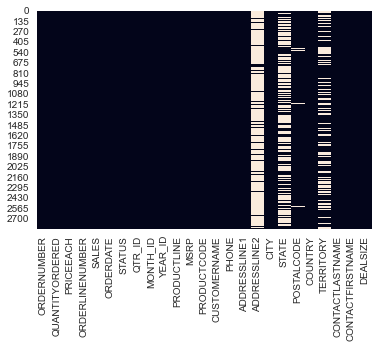

In [8]:
sns.heatmap(df.isnull(), cbar=False)

Otra forma práctica de verlo es con la librería missingno

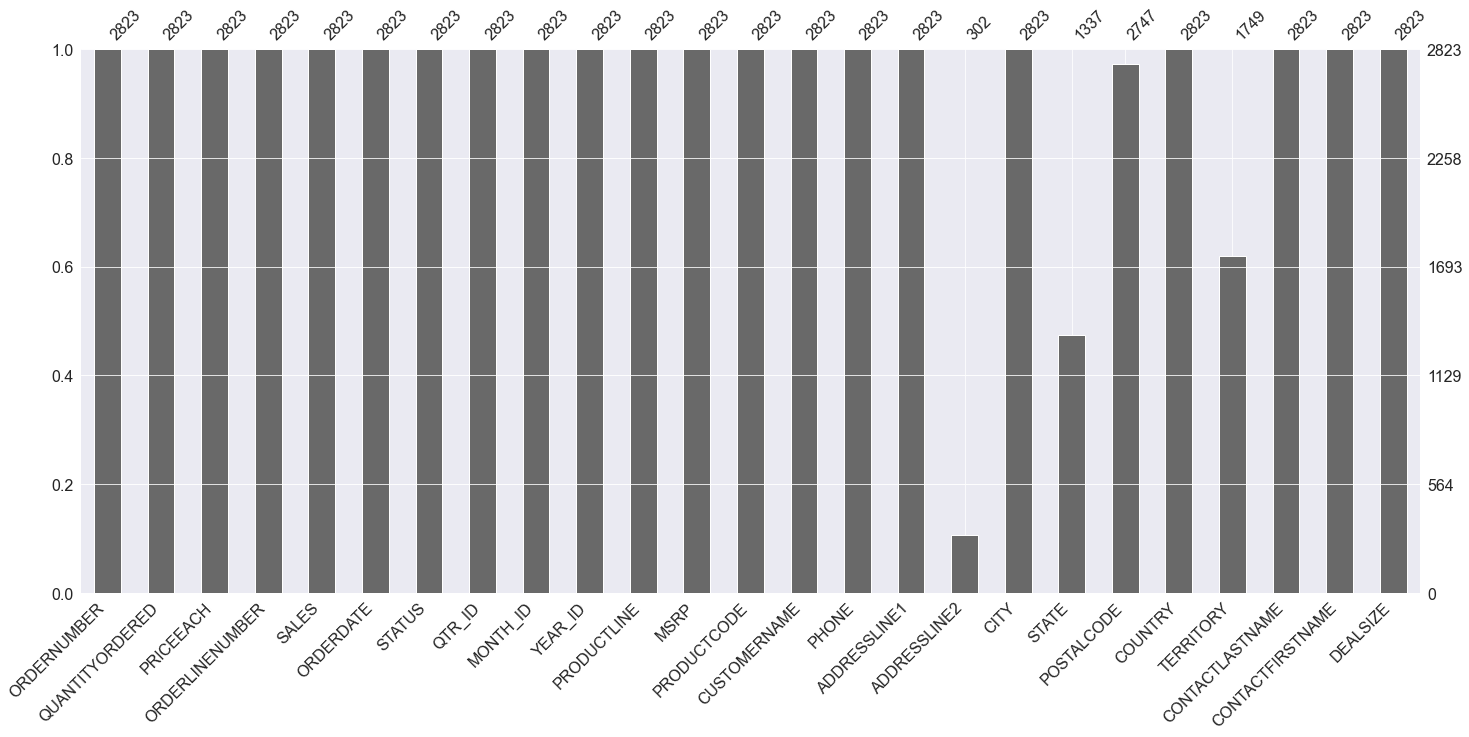

In [9]:
msno.bar(df)
plt.show()

Que columnas tienen valores nulos?

In [10]:
df.columns[df.isnull().sum()>0]

Index(['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY'], dtype='object')

Que haremos con esos valores?

**'ADDRESSLINE2'**:<BR>
<ol>
<li>Es un valor accesorio a 'ADDRESSLINE1', el cual ya te ubica el cliente dentro de la ciudad y además no tiene valores nulos<br></li>
<li>Por otro lado con el resto de los valores del dataset tampoco podríamos estimarlo<br></li>
</ol>
No se puede determinar, por ende, se lo lleva a cero:<br>

In [11]:
df['ADDRESSLINE2']=df['ADDRESSLINE2'].fillna("No addressline 2")

**'STATE'** se puede determinar con 'CITY' y 'COUNTRY', lo vamos a intentar más adelante

**'POSTALCODE'**:<br>
<ol>
<li>Es un valor accesorio a 'ADDRESSLINE1', el cual ya te ubica el cliente dentro de la ciudad y además no tiene valores nulos<br></li>
<li>Por otro lado con el resto de los valores del dataset tampoco podríamos estimarlo<br></li>
</ol>
No se puede determinar, por ende, se lo lleva a cero:<br>

In [12]:
df['POSTALCODE']=df['POSTALCODE'].fillna("No POSTALCODE")

**'TERRITORY'** se puede determinar con 'COUNTRY'y 'CITY', lo vamos a intentar más adelante

Comenzamos a corregir

**'STATE'**

Como dijimos antes, nos vamos a servir de los datos de 'COUNTRY' y 'CITY' para determinar el state de cada registro

In [13]:
df.loc[:,['COUNTRY','STATE','CITY']][df['STATE'].isnull()].sort_values('COUNTRY')

COUNTRY STATE        CITY
1216  Austria   NaN    Salzburg
366   Austria   NaN    Salzburg
362   Austria   NaN    Salzburg
2151  Austria   NaN        Graz
315   Austria   NaN    Salzburg
...       ...   ...         ...
681        UK   NaN  Manchester
759        UK   NaN      London
1804       UK   NaN   Liverpool
1321       UK   NaN      London
1276       UK   NaN      London

[1486 rows x 3 columns]

**'TERRITORY'**

La columna 'TERRITORY' hace referencia al grupo de paises. Parece que el valor faltante es para los paises de USA y Canada

In [14]:
df.groupby('TERRITORY',dropna=False, sort=False)['COUNTRY'].value_counts(dropna=False)

TERRITORY  COUNTRY    
EMEA       Spain           342
           France          314
           UK              144
           Italy           113
           Finland          92
           Norway           85
           Denmark          63
           Germany          62
           Sweden           57
           Austria          55
           Belgium          33
           Switzerland      31
           Ireland          16
APAC       Australia       185
           Singapore        36
Japan      Japan            52
           Singapore        43
           Philippines      26
NaN        USA            1004
           Canada           70
Name: COUNTRY, dtype: int64

<ul>
<li><b>APAC</b> = East Asia, South Asia and Oceania</li> <BR>
<li><b>EMEA</b> = Europe, Middle East, Africa</li><BR>
<li><b>JAPAN</b> = Japan, Singapore, Philippines</li><BR>
</ul>

Por ende le creamos una categoría 

<li><b>NA</b> = North America; USA, Canada<BR></li>

In [15]:
df['TERRITORY']=df['TERRITORY'].fillna("NA")

In [16]:
df.groupby('TERRITORY',dropna=False, sort=False)['COUNTRY'].value_counts(dropna=False)

TERRITORY  COUNTRY    
NA         USA            1004
           Canada           70
EMEA       Spain           342
           France          314
           UK              144
           Italy           113
           Finland          92
           Norway           85
           Denmark          63
           Germany          62
           Sweden           57
           Austria          55
           Belgium          33
           Switzerland      31
           Ireland          16
APAC       Australia       185
           Singapore        36
Japan      Japan            52
           Singapore        43
           Philippines      26
Name: COUNTRY, dtype: int64

In [17]:
df['TERRITORY'].value_counts(dropna=False)

EMEA     1407
NA       1074
APAC      221
Japan     121
Name: TERRITORY, dtype: int64

👍

Vemos la descripción de solo las variables cuantitativas

In [18]:
df.describe()

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25%     2203.430000     2.000000     4.000000  2003.00000    68.000000  
50%     3184.800000     3.000000     8.000000  2004.00000    99.000000  
75%     4508.000000     4.000000    11.000000  2004.00000   124.000000  
max    14082.800000     4.000000    12.000000  2005.00000   214.000000

Incluyo también la fecha

In [19]:
df.describe(datetime_is_numeric=True)

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25%     2203.430000     2.000000     4.000000  2003.00000    68.000000  
50%     3184.800000     3.000000     8.000000  2004.00000    99.000000  
75%     4508.000000     4.000000    11.000000  2004.00000   124.000000  
max    14082.800000     4.000000    12.000000  2005.00000   214.000000

Vemos la descripción de las variables cualitativas

In [20]:
df.describe(exclude=[np.number])  # seria lo mismo que decir df.describe(include=[object])

ORDERDATE   STATUS   PRODUCTLINE PRODUCTCODE  \
count              2823     2823          2823        2823   
unique              252        6             7         109   
top     11/14/2003 0:00  Shipped  Classic Cars    S18_3232   
freq                 38     2617           967          52   

                 CUSTOMERNAME           PHONE        ADDRESSLINE1  \
count                    2823            2823                2823   
unique                     92              91                  92   
top     Euro Shopping Channel  (91) 555 94 44  C/ Moralzarzal, 86   
freq                      259             259                 259   

            ADDRESSLINE2    CITY STATE POSTALCODE COUNTRY TERRITORY  \
count               2823    2823  1337       2823    2823      2823   
unique                10      73    16         74      19         4   
top     No addressline 2  Madrid    CA      28034     USA      EMEA   
freq                2521     304   416        259    1004      1407   

       CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
count             2823             2823     2823  
unique              77               72        3  
top             Freyre            Diego   Medium  
freq               259              259     1384

Damos un poco de formato

In [21]:
df.ORDERDATE = pd.to_datetime(df.ORDERDATE)
df.YEAR_ID=df.YEAR_ID.astype('int')
df.MONTH_ID=df.MONTH_ID.astype('int')
df.QTR_ID=df.QTR_ID.astype('int')

In [22]:
df.shape

(2823, 25)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int32         
 8   MONTH_ID          2823 non-null   int32         
 9   YEAR_ID           2823 non-null   int32         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

### Introducción al análisis descriptivo (EDA)

Estadísticas básicas del DF

In [24]:
df.describe().T

count          mean          std       min       25%  \
ORDERNUMBER      2823.0  10258.725115    92.085478  10100.00  10180.00   
QUANTITYORDERED  2823.0     35.092809     9.741443      6.00     27.00   
PRICEEACH        2823.0     83.658544    20.174277     26.88     68.86   
ORDERLINENUMBER  2823.0      6.466171     4.225841      1.00      3.00   
SALES            2823.0   3553.889072  1841.865106    482.13   2203.43   
QTR_ID           2823.0      2.717676     1.203878      1.00      2.00   
MONTH_ID         2823.0      7.092455     3.656633      1.00      4.00   
YEAR_ID          2823.0   2003.815090     0.699670   2003.00   2003.00   
MSRP             2823.0    100.715551    40.187912     33.00     68.00   

                     50%      75%      max  
ORDERNUMBER      10262.0  10333.5  10425.0  
QUANTITYORDERED     35.0     43.0     97.0  
PRICEEACH           95.7    100.0    100.0  
ORDERLINENUMBER      6.0      9.0     18.0  
SALES             3184.8   4508.0  14082.8  
QTR_ID               3.0      4.0      4.0  
MONTH_ID             8.0     11.0     12.0  
YEAR_ID           2004.0   2004.0   2005.0  
MSRP                99.0    124.0    214.0

Ahora vemos la correlación entre las variables

In [25]:
correlation = df.corr(method="pearson")
correlation.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.065543  -0.002935        -0.055550   
QUANTITYORDERED     0.065543         1.000000   0.005564        -0.018397   
PRICEEACH          -0.002935         0.005564   1.000000        -0.020965   
ORDERLINENUMBER    -0.055550        -0.018397  -0.020965         1.000000   
SALES               0.039919         0.551426   0.657841        -0.058400   

                    SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  
ORDERNUMBER      0.039919 -0.051383 -0.039723  0.904596 -0.010280  
QUANTITYORDERED  0.551426 -0.035323 -0.039048  0.069535  0.017881  
PRICEEACH        0.657841  0.008712  0.005152 -0.005938  0.670625  
ORDERLINENUMBER -0.058400  0.040716  0.034016 -0.057367 -0.021067  
SALES            1.000000 -0.006796 -0.009605  0.035647  0.635239

Como es un archivo de ventas de productos, queremos identificar si la cantidad de productos que se venden esta correlacionado con el precio y la conclusión es que no porque el número es cercano a 0. Aunque si podemos ver que el precio sugerido de fabrica es relacionable con el precio unitario. Solo que si vemos el scatterplot a continuación podemos ver que varian en algunos casos

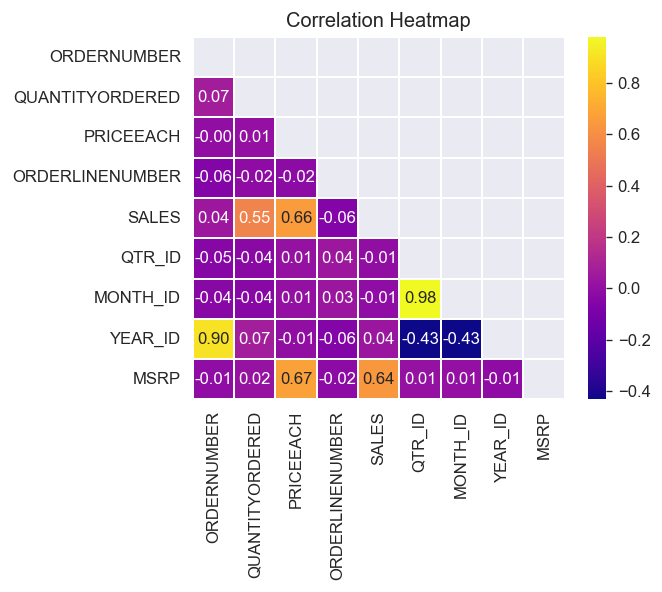

In [26]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

### Análisis Univariado

Chequeo cuales son las ciudades con mas cantidad de ventas y ya que lo ordenamos lo agrupamos también por territorio 

<AxesSubplot:>

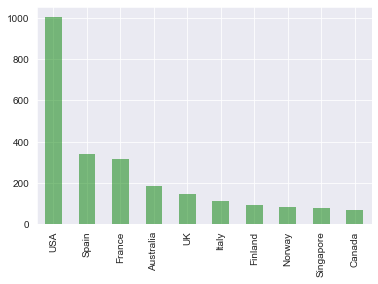

In [27]:
df["COUNTRY"].value_counts().head(10).plot.bar(alpha=0.5, color='green', edgecolor='none')

A partir de acá podemos ver que si bien la mayor parte de las ventas se dan en USA, las mismas no superan las del territorio europeo.

<AxesSubplot:>

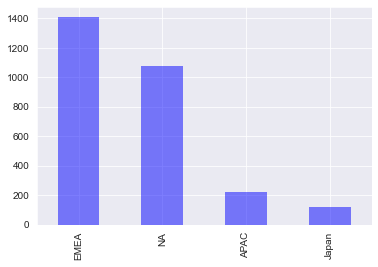

In [28]:
df["TERRITORY"].value_counts().head(10).plot.bar(alpha=0.5, color='blue', edgecolor='none')

Generamos un histograma donde se puede visualizar que la distribución es asimétrica y la mayor parte de las ventas se ve entre los 2000 y 4000

<AxesSubplot:ylabel='Frequency'>

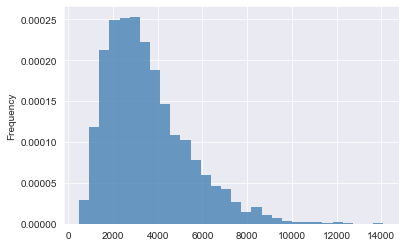

In [29]:
df['SALES'].plot.hist(bins=30, density=True, alpha=0.8, histtype='stepfilled', color='steelblue', edgecolor='none')

### Análisis bivariado

Vemos relación por Pairplot

<Figure size 720x480 with 0 Axes>

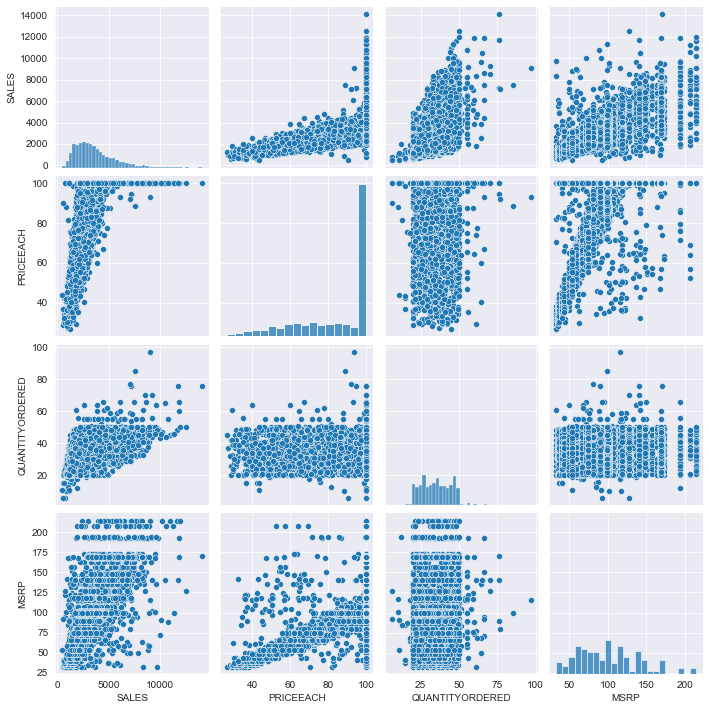

In [30]:
plt.figure(dpi=120)
sns.pairplot(df, vars=["SALES", "PRICEEACH", "QUANTITYORDERED","MSRP"],height = 2.5)
plt.show()

Agrandamos el de MSRP vs Price each

In [31]:
px.scatter(df, x="PRICEEACH", y="MSRP", color='PRODUCTLINE', title='Precio unitario vs precio sugerido de fábrica')

In [32]:
px.box(df,x="PRODUCTLINE", y='MSRP')

In [33]:
px.box(df,x="PRODUCTLINE", y='PRICEEACH')

En este caso la pregunta que podemos hacernos es si las variaciones de precio se deben a algún criterio particular, principalmente porque lo que se más se comercializa son autos clásicos o serían datos mal cargados

In [34]:
fig = px.pie(df, values='SALES', names='PRODUCTLINE')
fig.show()

El gráfico de torta nos muestra no solo los porcentajes de productos más vendidos sino también el total de cada venta que podemos visualizarlo de forma menos intuitiva en las tablas a continuación

In [35]:
df[["PRODUCTLINE","SALES"]].groupby(['PRODUCTLINE'], as_index=False).sum().sort_values(by='SALES', ascending=False)

PRODUCTLINE       SALES
0      Classic Cars  3919615.66
6      Vintage Cars  1903150.84
1       Motorcycles  1166388.34
5  Trucks and Buses  1127789.84
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47

In [36]:
df[["PRODUCTLINE","SALES","COUNTRY"]].groupby(["COUNTRY",'PRODUCTLINE'], as_index=False).sum().sort_values(by='SALES', ascending=False)

COUNTRY       PRODUCTLINE       SALES
109          USA      Classic Cars  1344638.22
115          USA      Vintage Cars   757755.90
110          USA       Motorcycles   520371.70
87         Spain      Classic Cars   476165.15
114          USA  Trucks and Buses   397842.42
..           ...               ...         ...
68         Japan            Trains     3523.67
54       Ireland            Trains     3112.60
56       Ireland      Vintage Cars     2234.40
80   Philippines      Vintage Cars     1935.09
4      Australia            Trains     1681.35

[116 rows x 3 columns]

In [37]:
fig = px.pie(df, values='SALES', names='DEALSIZE')
fig.show()

### Análisis multivariado

In [38]:
pd.pivot_table(df,index=["PRODUCTLINE"],columns=["TERRITORY"],values=["SALES"],aggfunc=np.sum)

SALES                                   
TERRITORY              APAC        EMEA      Japan          NA
PRODUCTLINE                                                   
Classic Cars      244758.07  2086994.66  181601.49  1406261.44
Motorcycles        89968.76   503096.70   48773.69   524549.19
Planes             74853.87   476122.91   70083.83   353942.96
Ships               4159.76   427264.68   33015.54   249997.15
Trains              1681.35   138506.18   16802.38    69253.56
Trucks and Buses  121847.96   498305.82   57847.66   449788.40
Vintage Cars      208852.06   848981.46   47048.63   798268.69

In [39]:
fig = px.bar(df, x='TERRITORY', y='SALES',color="PRODUCTLINE", opacity =1 ,color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta","yellow"])
fig.show()

Creamos el Pairplot con hue='status'

<Figure size 720x480 with 0 Axes>

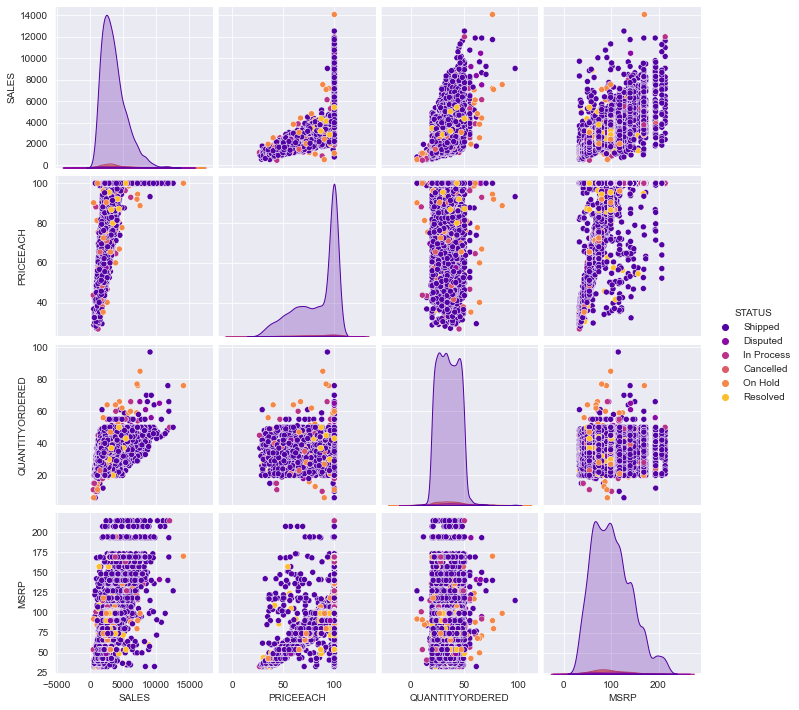

In [40]:
plt.figure(dpi = 120)
sns.pairplot(df,vars=["SALES", "PRICEEACH", "QUANTITYORDERED","MSRP"],hue = 'STATUS',palette = 'plasma')
plt.show()

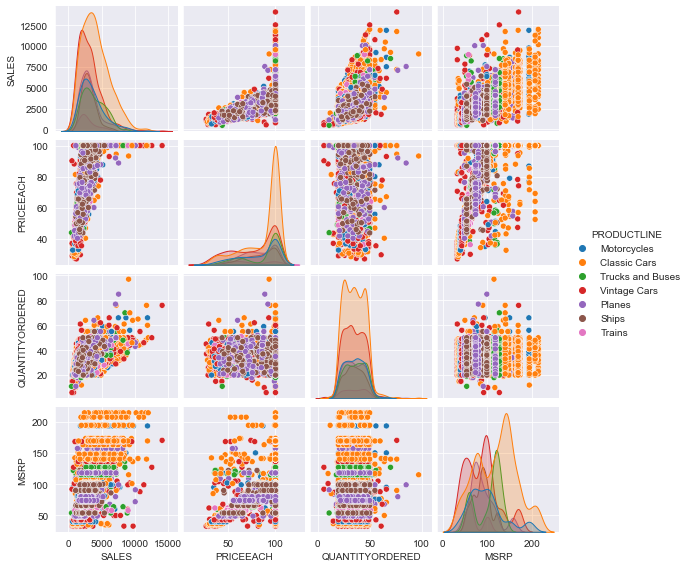

In [41]:
sns.pairplot(df, vars=["SALES", "PRICEEACH", "QUANTITYORDERED","MSRP"], hue = 'PRODUCTLINE', height = 2 , palette = 'tab10')

De este grafico podemos extraer el histograma de quantity donde se ve que la mayor cantidad de productos solicitados son los más pequeños y no serían los autos clásicos

Creamos una tabla para trabajar solo con las variables numéricas

In [42]:
df_1=df[['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','SALES','QTR_ID','MONTH_ID','YEAR_ID']]
df_1

ORDERNUMBER  QUANTITYORDERED  PRICEEACH    SALES  QTR_ID  MONTH_ID  \
0           10107               30      95.70  2871.00       1         2   
1           10121               34      81.35  2765.90       2         5   
2           10134               41      94.74  3884.34       3         7   
3           10145               45      83.26  3746.70       3         8   
4           10159               49     100.00  5205.27       4        10   
...           ...              ...        ...      ...     ...       ...   
2818        10350               20     100.00  2244.40       4        12   
2819        10373               29     100.00  3978.51       1         1   
2820        10386               43     100.00  5417.57       1         3   
2821        10397               34      62.24  2116.16       1         3   
2822        10414               47      65.52  3079.44       2         5   

      YEAR_ID  
0        2003  
1        2003  
2        2003  
3        2003  
4        2003  
...       ...  
2818     2004  
2819     2005  
2820     2005  
2821     2005  
2822     2005  

[2823 rows x 7 columns]

Hacemos el análisis de la variable Quantity ordered respecto al resto

Joint plot de QUANTITYORDERED con otras variables ==> 

Correlacion entre QUANTITYORDERD y PRICEEACH ==>  0.005564033259239927


<Figure size 500x400 with 0 Axes>

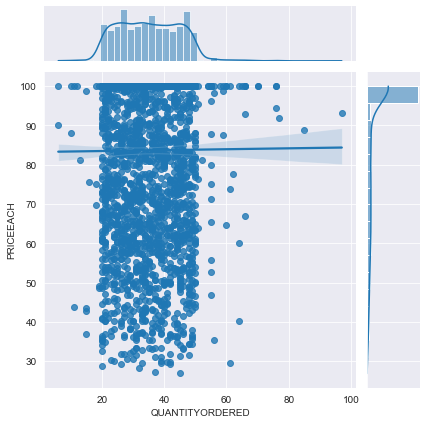

Correlacion entre QUANTITYORDERD y SALES ==>  0.5514261919183581


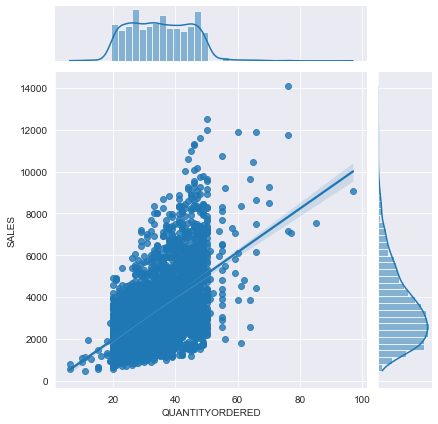

Correlacion entre QUANTITYORDERD y QTR_ID ==>  -0.035323464366988994


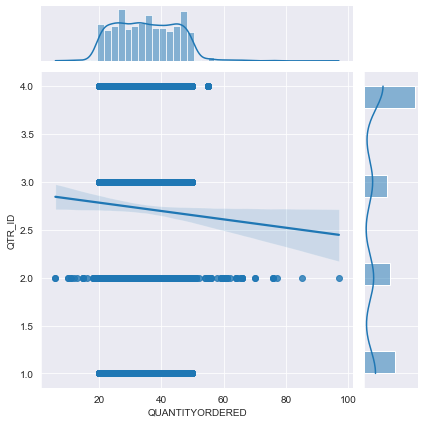

Correlacion entre QUANTITYORDERD y MONTH_ID ==>  -0.03904834674589771


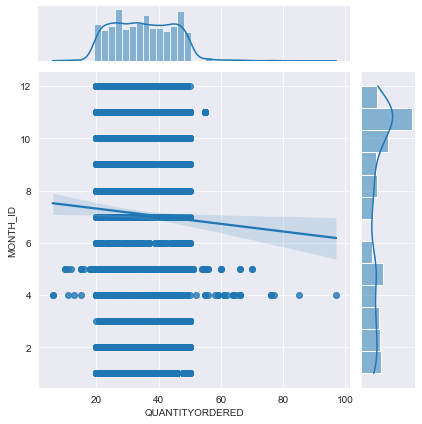

Correlacion entre QUANTITYORDERD y YEAR_ID ==>  0.06953488241608229


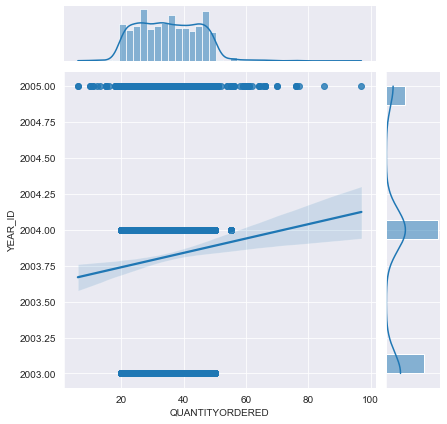

In [43]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de QUANTITYORDERED con otras variables ==> \n")
for i in  df_1.columns:
    if i != 'QUANTITYORDERED' and i !='ORDERNUMBER':
        print(f"Correlacion entre QUANTITYORDERD y {i} ==> ",df_1.corr().loc['QUANTITYORDERED'][i])
        sns.jointplot(x='QUANTITYORDERED',y=i,data=df_1, kind='reg')
        plt.show()

**Insight**: 
QUANTITYORDERED tiene lineal positiva con el monto de ventas 'SALES'.Con el resto de las variables no tiene relación alguna, casi cero. Excepto con el año 'YEAR_ID', se ve que las cantidades vendidas si se incrementaron con los años de venta de la empresa

Crear el join plot entre PRICEEACH y el resto de las variables con su correspondiente interpretación.

Joint plot de PRICEEACH con otras variables ==> 

Correlacion entre PRICEEACH y SALES ==>  0.6578409283176879


<Figure size 500x400 with 0 Axes>

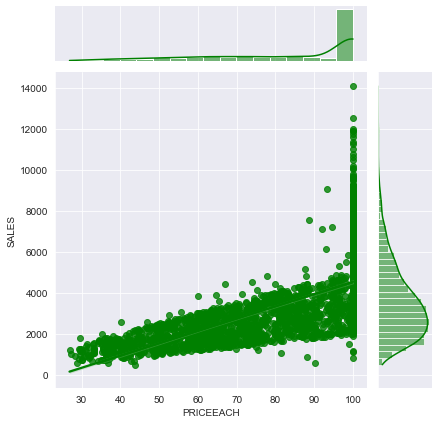

Correlacion entre PRICEEACH y QTR_ID ==>  0.008712266409627313


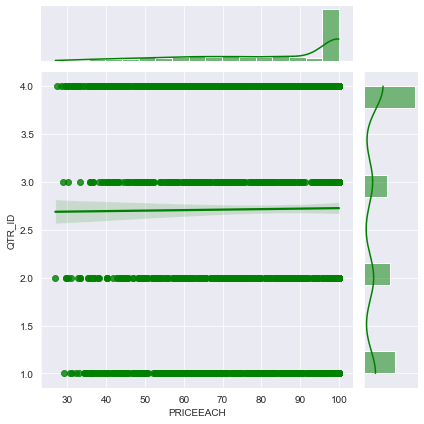

Correlacion entre PRICEEACH y MONTH_ID ==>  0.005151966789452903


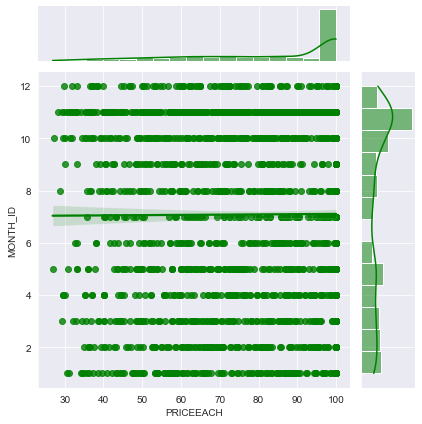

Correlacion entre PRICEEACH y YEAR_ID ==>  -0.005938470261633583


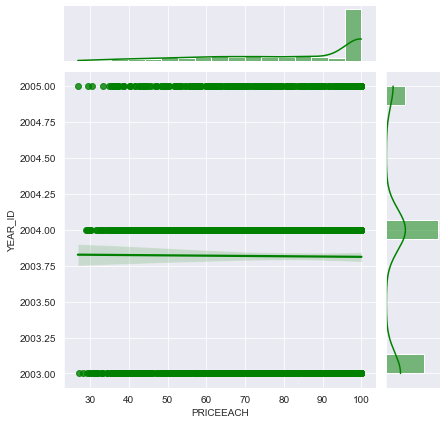

In [44]:
col = list(df_1.columns)
idx = col.index('PRICEEACH')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de PRICEEACH con otras variables ==> \n")
for i in  range(idx+1,len(col)):
    print(f"Correlacion entre PRICEEACH y {col[i]} ==> ",df_1.corr().loc['PRICEEACH'][col[i]])
    sns.jointplot(x='PRICEEACH',y=col[i],data=df_1,kind = 'reg',color = 'green')
    plt.show()

**Insight**: 
PRICEEACH guarda una relación lineal positiva con el monto total de ventas 'SALES'. Sin embargo, no demuestra relación alguna con el momento en que se hace la venta, QTR, Month, Year.

Crear el join plot entre SALES y el resto de las variables con su correspondiente interpretación.

Joint plot de SALES con otras variables ==> 

Correlacion entre SALES y QTR_ID ==>  -0.006796085377388851


<Figure size 500x400 with 0 Axes>

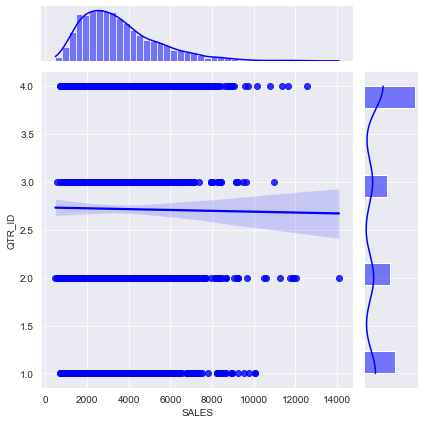

Correlacion entre SALES y MONTH_ID ==>  -0.009605185692693599


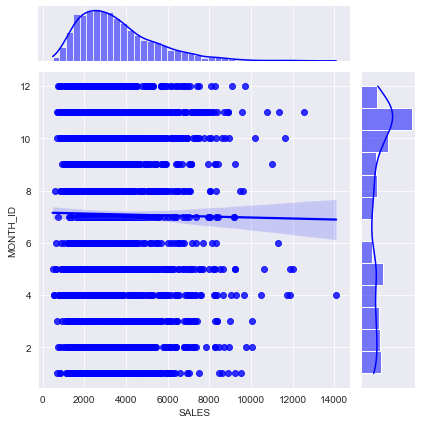

Correlacion entre SALES y YEAR_ID ==>  0.035646893086005965


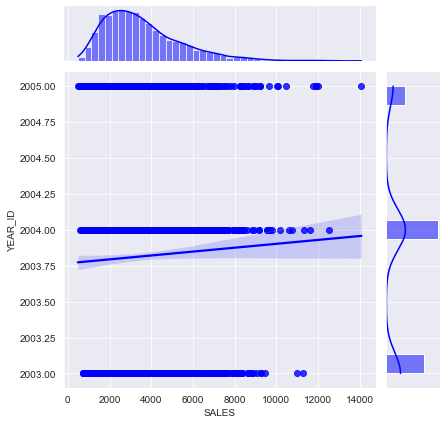

In [45]:
col = list(df_1.columns)
idx = col.index('SALES')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de SALES con otras variables ==> \n")
for i in  range(idx+1,len(col)):
    print(f"Correlacion entre SALES y {col[i]} ==> ",df.corr().loc['SALES'][col[i]])
    sns.jointplot(x='SALES',y=col[i],data=df_1,kind = 'reg',color = 'blue')
    plt.show()

**Insight**: 
Los mayor cantidad de montos de ventas realizadas está entre $(2000;4000). El mes que mayour cantidad de ventas presentó es el mes de noviembre, lo que impacta también en las cantidades de ventas por Q, también es el Q4 el de mayor cantidad de ventas.
También se puede ver una leve relación lineal positiva entre el volumen de ventas y los años. Es decir, las ventas vienen creciendo con los años de ejercer el negocio

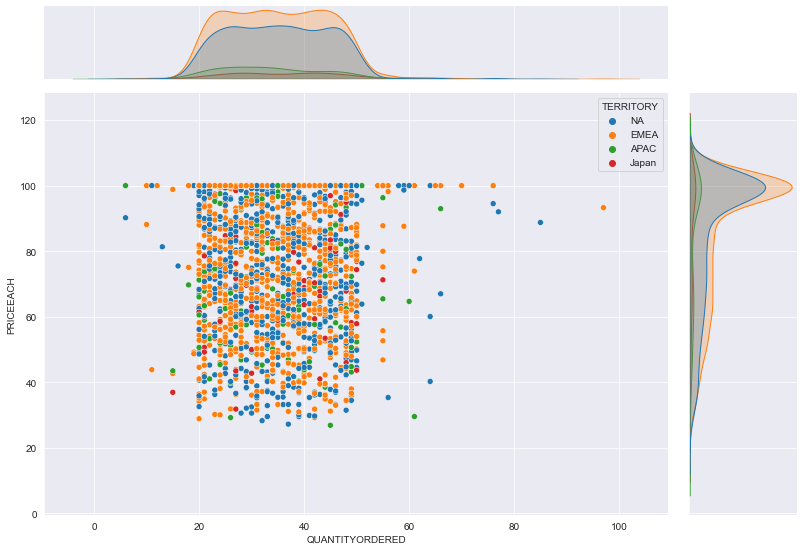

In [46]:
ax = sns.jointplot(x='QUANTITYORDERED', y='PRICEEACH', data=df, hue="TERRITORY", palette="tab10")
ax.fig.set_figwidth(12)
ax.fig.set_figheight(8)

A continuación, para ver la evolución de las ventas a lo largo de los años

Transformamos la variable Year_ID a texto

In [47]:
df.YEAR_ID=df.YEAR_ID.astype('str')

<AxesSubplot:xlabel='YEAR_ID', ylabel='SALES'>

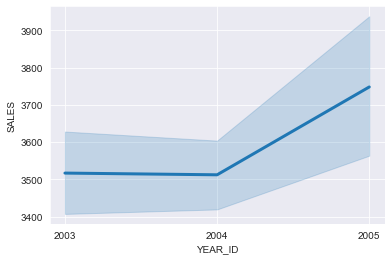

In [48]:
sns.axes_style("white")
sns.lineplot(data=df, x="YEAR_ID", y="SALES",palette="hls",linewidth=3)

<AxesSubplot:xlabel='YEAR_ID', ylabel='SALES'>

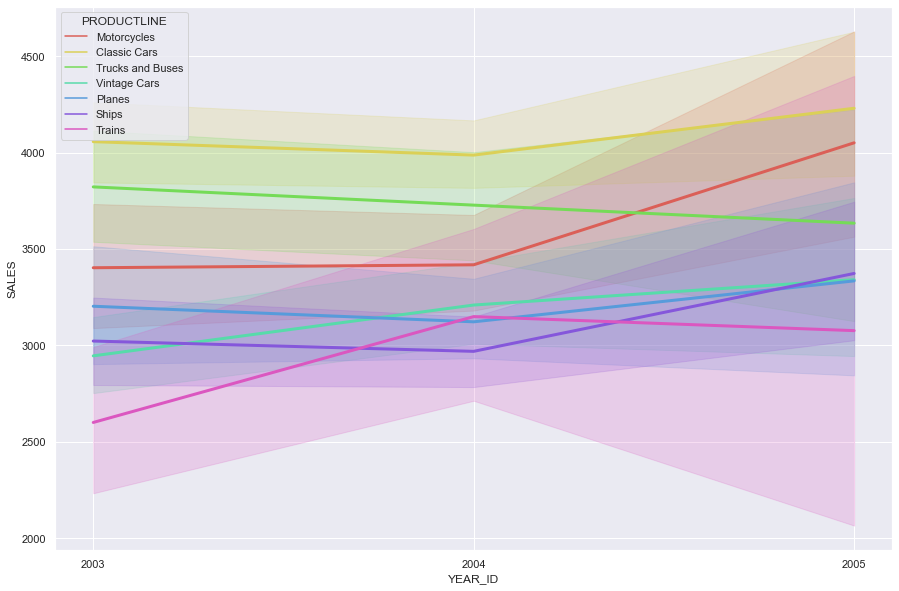

In [49]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.axes_style("white")
sns.lineplot(data=df, x="YEAR_ID", y="SALES",hue="PRODUCTLINE",palette="hls",linewidth=3)

Cambiar el año a STR nos ayuda visualmente a ver la distribución de las ventas

##### Conclusiones generales EDA

<ol>
    <li>El producto que más se comercializa es el de autos clásicos </li>
    <li>Las ventas tienen una tendencia alcista en los 3 años que abarca el análisis</li>
    <li>Las cantidades vendidas no guardan una correlación lineal positiva con el precio unitario</li>
    <li>No hay una relación clara entre el precio sugerido de fábrica y el precio unitario.</li>
    <li>Si bien el país con más ventas es US, el territorio con más ventas es EMEA</li>
    <li>Dado los datos que nos muestra la tabla y a partir de su análisis concluimos que el objetivo del próximo análisis será poder predecir la venta futura de una línea de productos, que es la más vendida. No lo hacemos por el total los artículos son variados y tienen distinto comportamiento.
</ol>

### Data Wrangling Parte II - Preparación del dataset para el análisis de series de tiempo

In [50]:
df2=df.drop(["ADDRESSLINE2","ADDRESSLINE1","CONTACTLASTNAME","CONTACTFIRSTNAME","PHONE","ORDERLINENUMBER","ORDERNUMBER","QTR_ID","MONTH_ID","YEAR_ID","POSTALCODE"], axis="columns")
df2

QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE    STATUS  PRODUCTLINE  \
0                  30      95.70  2871.00 2003-02-24   Shipped  Motorcycles   
1                  34      81.35  2765.90 2003-05-07   Shipped  Motorcycles   
2                  41      94.74  3884.34 2003-07-01   Shipped  Motorcycles   
3                  45      83.26  3746.70 2003-08-25   Shipped  Motorcycles   
4                  49     100.00  5205.27 2003-10-10   Shipped  Motorcycles   
...               ...        ...      ...        ...       ...          ...   
2818               20     100.00  2244.40 2004-12-02   Shipped        Ships   
2819               29     100.00  3978.51 2005-01-31   Shipped        Ships   
2820               43     100.00  5417.57 2005-03-01  Resolved        Ships   
2821               34      62.24  2116.16 2005-03-28   Shipped        Ships   
2822               47      65.52  3079.44 2005-05-06   On Hold        Ships   

      MSRP PRODUCTCODE              CUSTOMERNAME           CITY STATE  \
0       95    S10_1678         Land of Toys Inc.            NYC    NY   
1       95    S10_1678        Reims Collectables          Reims   NaN   
2       95    S10_1678           Lyon Souveniers          Paris   NaN   
3       95    S10_1678         Toys4GrownUps.com       Pasadena    CA   
4       95    S10_1678  Corporate Gift Ideas Co.  San Francisco    CA   
...    ...         ...                       ...            ...   ...   
2818    54    S72_3212     Euro Shopping Channel         Madrid   NaN   
2819    54    S72_3212   Oulu Toy Supplies, Inc.           Oulu   NaN   
2820    54    S72_3212     Euro Shopping Channel         Madrid   NaN   
2821    54    S72_3212              Alpha Cognac       Toulouse   NaN   
2822    54    S72_3212         Gifts4AllAges.com         Boston    MA   

      COUNTRY TERRITORY DEALSIZE  
0         USA        NA    Small  
1      France      EMEA    Small  
2      France      EMEA   Medium  
3         USA        NA   Medium  
4         USA        NA   Medium  
...       ...       ...      ...  
2818    Spain      EMEA    Small  
2819  Finland      EMEA   Medium  
2820    Spain      EMEA   Medium  
2821   France      EMEA    Small  
2822      USA        NA   Medium  

[2823 rows x 14 columns]

#### Para el análisis de series de tiempo utilizaremos la libería sklearn

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

Como mencionamos al comienzo del análisis nuestro objetivo es predecir el valor del volumen de ventas y para realizarlo debemos agrupar los datos en función de una serie de tiempo. En los pasos siguientes vamos a transformar la fecha a datetime, ordenarla, agruparla de forma mensual y asi poder establecer la frecuencia. Para simplificar el análisis vamos también a filtrar la venta por producto más vendido, que son los autos clásicos

In [52]:
#A través de este gráfico visualizamos el producto más vendido
fig = px.pie(df2, values='SALES', names='PRODUCTLINE')
fig.show()

In [53]:
Data1=df2[df2["PRODUCTLINE"]=="Classic Cars"].groupby("ORDERDATE")["QUANTITYORDERED","SALES"].sum()
Data1

QUANTITYORDERED     SALES
ORDERDATE                            
2003-01-29              110  15263.70
2003-01-31              224  25928.08
2003-02-11              120  20464.41
2003-03-03              391  42605.87
2003-03-10              212  27398.82
...                     ...       ...
2005-05-05              154  27199.08
2005-05-06               19   2764.88
2005-05-17              509  59475.10
2005-05-29              288  23425.66
2005-05-31              276  34335.00

[163 rows x 2 columns]

In [54]:
Data1=Data1.resample("M").sum()
Data1.head(5)

QUANTITYORDERED      SALES
ORDERDATE                             
2003-01-31              334   41191.78
2003-02-28              120   20464.41
2003-03-31              929  105026.68
2003-04-30              465   59873.60
2003-05-31              934   98179.48

In [55]:
Data2 = pd.DataFrame(data=Data1)
Data2.head(5)

QUANTITYORDERED      SALES
ORDERDATE                             
2003-01-31              334   41191.78
2003-02-28              120   20464.41
2003-03-31              929  105026.68
2003-04-30              465   59873.60
2003-05-31              934   98179.48

In [56]:
Data2 = pd.DataFrame(data=Data1)
Data2.head(5)

QUANTITYORDERED      SALES
ORDERDATE                             
2003-01-31              334   41191.78
2003-02-28              120   20464.41
2003-03-31              929  105026.68
2003-04-30              465   59873.60
2003-05-31              934   98179.48

In [57]:
Data2 = Data2.asfreq(freq='M')
Data2.head(5)

QUANTITYORDERED      SALES
ORDERDATE                             
2003-01-31              334   41191.78
2003-02-28              120   20464.41
2003-03-31              929  105026.68
2003-04-30              465   59873.60
2003-05-31              934   98179.48

Por último antes de comenzar el análisis chequeamos que no tengamos filas faltantes y este bien establecida la fecha

In [58]:
print(f'Número de filas con missing values: {Data2.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


In [59]:
# Verificar que un índice temporal está completo
# ==============================================================================
(Data2.index == pd.date_range(
                    start = Data2.index.min(),
                    end   = Data2.index.max(),
                    freq  = Data2.index.freq)
).all()

True

El próximo gráfico nos muestra la trayectoria de la venta a lo largo del tiempo. La pregunta que surge es si existe un comportamiento estacionario en algún período de tiempo y se podría decir que sí en el último quarter del año dado que es época de recambios en la mayoría de las automotrices.

<AxesSubplot:xlabel='ORDERDATE'>

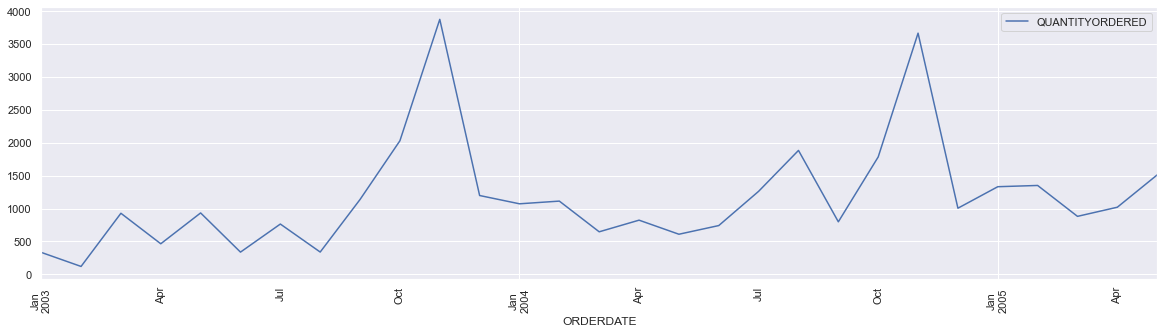

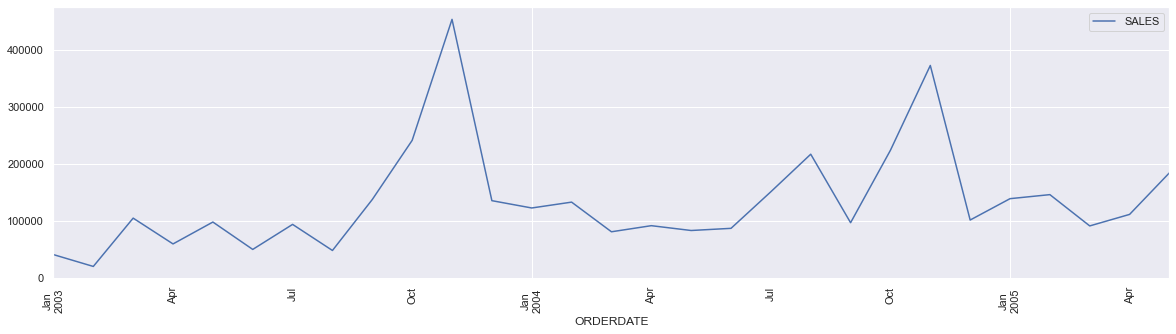

In [60]:
Data2[["QUANTITYORDERED"]].plot(rot=90,figsize=(20,5))
Data2[["SALES"]].plot(rot=90,figsize=(20,5))

In [61]:
X = Data2[["SALES","QUANTITYORDERED"]]
X.head(4)

SALES  QUANTITYORDERED
ORDERDATE                             
2003-01-31   41191.78              334
2003-02-28   20464.41              120
2003-03-31  105026.68              929
2003-04-30   59873.60              465

In [62]:
X['Sales-1'] = X['SALES'].shift(1)
X['Sales-2'] = X['SALES'].shift(2)
X['Sales-3'] = X['SALES'].shift(3)
X['Sales-4'] = X['SALES'].shift(4)
X['Sales-5'] = X['SALES'].shift(5)
X.head(10)

SALES  QUANTITYORDERED    Sales-1    Sales-2    Sales-3  \
ORDERDATE                                                                 
2003-01-31   41191.78              334        NaN        NaN        NaN   
2003-02-28   20464.41              120   41191.78        NaN        NaN   
2003-03-31  105026.68              929   20464.41   41191.78        NaN   
2003-04-30   59873.60              465  105026.68   20464.41   41191.78   
2003-05-31   98179.48              934   59873.60  105026.68   20464.41   
2003-06-30   50256.79              338   98179.48   59873.60  105026.68   
2003-07-31   94055.58              765   50256.79   98179.48   59873.60   
2003-08-31   48406.61              339   94055.58   50256.79   98179.48   
2003-09-30  137666.87             1139   48406.61   94055.58   50256.79   
2003-10-31  241145.43             2032  137666.87   48406.61   94055.58   

              Sales-4    Sales-5  
ORDERDATE                         
2003-01-31        NaN        NaN  
2003-02-28        NaN        NaN  
2003-03-31        NaN        NaN  
2003-04-30        NaN        NaN  
2003-05-31   41191.78        NaN  
2003-06-30   20464.41   41191.78  
2003-07-31  105026.68   20464.41  
2003-08-31   59873.60  105026.68  
2003-09-30   98179.48   59873.60  
2003-10-31   50256.79   98179.48

#### Ingeniería de variables

In [63]:
X.reset_index(inplace=True)

In [64]:
X['Año'] = X['ORDERDATE'].dt.year
X['Mes'] = X['ORDERDATE'].dt.month
X['Dia_semana'] = X['ORDERDATE'].dt.weekday

X.set_index("ORDERDATE", inplace=True)
X.head(5)

SALES  QUANTITYORDERED    Sales-1    Sales-2   Sales-3  \
ORDERDATE                                                                
2003-01-31   41191.78              334        NaN        NaN       NaN   
2003-02-28   20464.41              120   41191.78        NaN       NaN   
2003-03-31  105026.68              929   20464.41   41191.78       NaN   
2003-04-30   59873.60              465  105026.68   20464.41  41191.78   
2003-05-31   98179.48              934   59873.60  105026.68  20464.41   

             Sales-4  Sales-5   Año  Mes  Dia_semana  
ORDERDATE                                             
2003-01-31       NaN      NaN  2003    1           4  
2003-02-28       NaN      NaN  2003    2           4  
2003-03-31       NaN      NaN  2003    3           0  
2003-04-30       NaN      NaN  2003    4           2  
2003-05-31  41191.78      NaN  2003    5           5

In [65]:
# Ahora quitamos los que tienen datos nulos, por lo que no se puede ver la serie de tiempo completa
X.dropna(inplace=True)
X.head(5)

SALES  QUANTITYORDERED    Sales-1   Sales-2    Sales-3  \
ORDERDATE                                                                
2003-06-30   50256.79              338   98179.48  59873.60  105026.68   
2003-07-31   94055.58              765   50256.79  98179.48   59873.60   
2003-08-31   48406.61              339   94055.58  50256.79   98179.48   
2003-09-30  137666.87             1139   48406.61  94055.58   50256.79   
2003-10-31  241145.43             2032  137666.87  48406.61   94055.58   

              Sales-4    Sales-5   Año  Mes  Dia_semana  
ORDERDATE                                                
2003-06-30   20464.41   41191.78  2003    6           0  
2003-07-31  105026.68   20464.41  2003    7           3  
2003-08-31   59873.60  105026.68  2003    8           6  
2003-09-30   98179.48   59873.60  2003    9           1  
2003-10-31   50256.79   98179.48  2003   10           4

### Selección de variables

In [66]:
y = X['SALES']
X.drop(columns=['SALES'], inplace=True)

En el próximo código vamos a ver la cantidad de ejemplos que se van a utilizar donde las features será el número de observaciones previas y el valor a predecir será el actual. En la resolución se observa que el número de ejemplos que utliza el modelo son 24 y el número de features 9.

In [67]:
print("Número de ejemplos de entrenamiento {}, número de features {}".format(X.shape[0], X.shape[1]))
print("Número de valores a predecir {}".format(y.shape))

Número de ejemplos de entrenamiento 24, número de features 9
Número de valores a predecir (24,)


In [68]:
# La partición de los datos se realiza con base en el tiempo
from sklearn.model_selection import TimeSeriesSplit

In [69]:
X.shape, y.shape

((24, 9), (24,))

In [70]:
# Definimos el número de splits para realizar cross-validation
tsp = TimeSeriesSplit(n_splits=2)
# La partición nos devuelve los indices de train y test
split1_idx, split2_idx = tsp.split(X, y)
print(split1_idx)
print(split2_idx)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 8,  9, 10, 11, 12, 13, 14, 15]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([16, 17, 18, 19, 20, 21, 22, 23]))


In [71]:
# Indexamos para obtener los conjuntos de train y test 
X_train = X.iloc[split2_idx[0]]
y_train = y.iloc[split2_idx[0]]
X_test = X.iloc[split2_idx[1]]
y_test = y.iloc[split2_idx[1]]

In [72]:
# Verificamos los tamaños de train, validation y test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 9)
(16,)
(8, 9)
(8,)


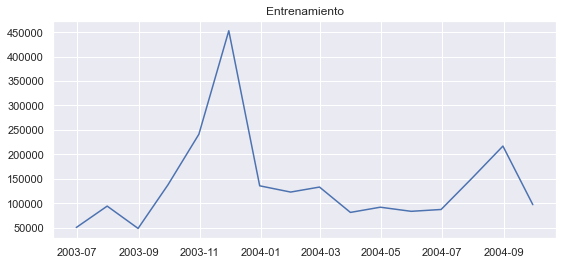

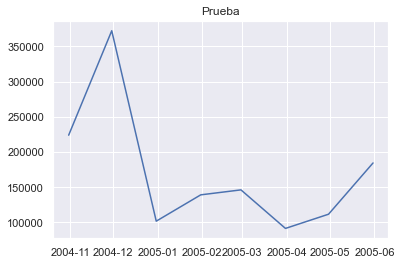

In [73]:
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(y_train)
plt.title("Entrenamiento")
plt.show()
plt.plot(y_test)
plt.title("Prueba")
plt.show()

### Modelado 

### Modelo Random Forecast

In [74]:
#Calculo el regresor
rr = RandomForestRegressor(n_estimators=100)

In [75]:
#Entreno el modelo
rr.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
#Calculo la predicción
y_pred_rr = rr.predict(X_test)

In [77]:
print('R2', r2_score(y_test, y_pred_rr))
print('mse', mean_squared_error(y_test, y_pred_rr))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_rr)))
print('mae', mean_absolute_error(y_test, y_pred_rr))

R2 0.7266229672549689
mse 2042674640.0606704
rmse 45195.9582270436
mae 31473.373850000025


#### Conclusiones en base a las métricas

<ol>
    <li>Las métricas del modelo no son buenas lo que predice un alto error. 
<li>Considerando que para R2 una estimación aceptable debería ser por encima del 95% nos da como conclusión que el modelo no seria tan bueno
<li>Si miramos el resto de las metricas vamos a ver que los errores son tambien muy altos. Una posible conclusión además de que los datos no son suficientes es que no estariamos contemplando correctamente la estacionalidad

#### Visualizamos los resultados 

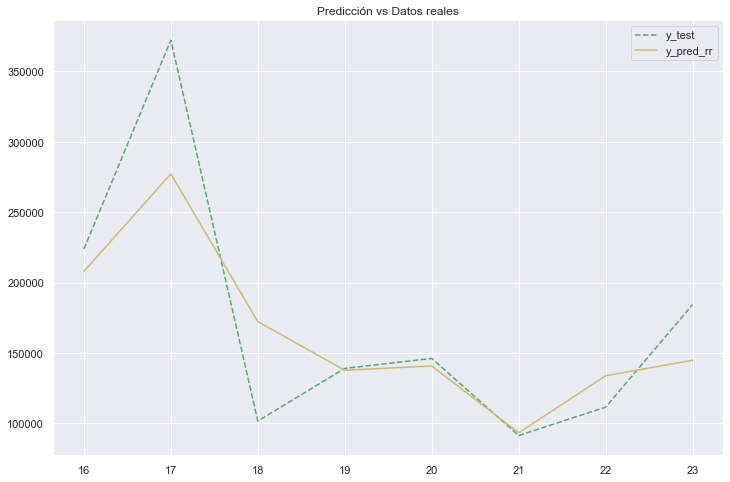

In [78]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]), y_test, "g--", 
         label="y_test")
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]), y_pred_rr, "y", 
         label="y_pred_rr")
plt.title("Predicción vs Datos reales")
plt.legend()

Text(0, 0.5, 'Predicción')

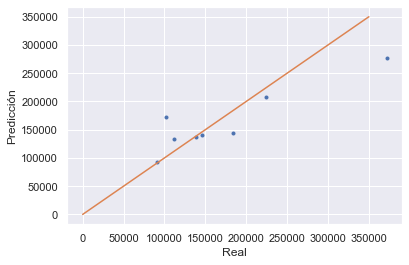

In [79]:
plt.plot(y_test, y_pred_rr, '.')
plt.plot([0,350000], [0,350000])
plt.xlabel("Real")
plt.ylabel("Predicción")

#### Ampliando la conclusión inicial...

Vemos que los errores mas altos se producirían en el tercer quarter que es donde se producen los picos en ventas

### Modelo de regresión lineal

##### Ajuste de hiperparámetros: Gridsearch
A fin de obtener el mejor desempeño de este modelo, buscamos los mejores parametros aplicando Gridsearch

#### Aplicamos el modelo de regresion con este hiperparámetro

In [80]:
grid = GridSearchCV(
       estimator=SVR(kernel='linear'),
       param_grid={
           'C': [0.1, 1, 4, 5]},
       cv=4, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [81]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 4, 5]},
             scoring='neg_mean_squared_error')

In [82]:
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 0.1}


In [83]:
svr = SVR(C=0.1, kernel="linear")
svr.fit(X_train, y_train)

SVR(C=0.1, kernel='linear')

In [84]:
y_pred_rl=svr.predict(X_test)

In [85]:
print('R2', r2_score(y_test, y_pred_rl))
print('mse', mean_squared_error(y_test, y_pred_rl))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_rl)))
print('mae', mean_absolute_error(y_test, y_pred_rl))

R2 0.9401944563134581
mse 446867339.9402829
rmse 21139.23697630269
mae 16065.066364541897


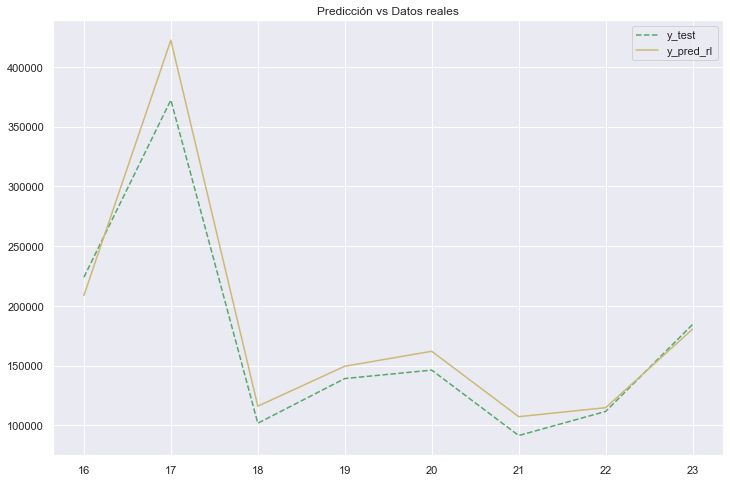

In [86]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]), y_test, "g--", 
         label="y_test")
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]), y_pred_rl, "y", 
         label="y_pred_rl")
plt.title("Predicción vs Datos reales")
plt.legend()

Text(0, 0.5, 'Predicción')

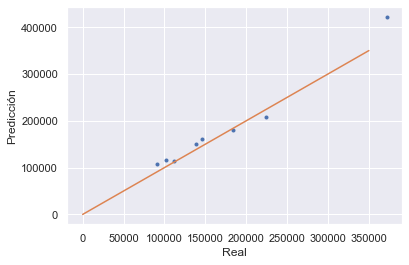

In [87]:
plt.plot(y_test, y_pred_rl, '.')
plt.plot([0,350000], [0,350000])
plt.xlabel("Real")
plt.ylabel("Predicción")

#### Conclusiones en base a las métricas

<ol>
    <li>Si bien las métricas siguen con altos errores y no representan un buen modelo la predicción mejora con el modelo de regresión lineal que entendemos que para series de tiempo es el modelo que más se adapta 
    <li>Contiuamos con un alto error para predecir los momentos de mayor venta

#### Ensamble de modelos
Dado que ambos modelos dan errores altos, optamos por ensamblarlos a fin de complementar los puntos en donde cada uno se destaca

In [1]:
X_test['Prediccion_Random_Forest']=y_pred_rr
X_test['Prediccion_Linear_Regression']=y_pred_rl

NameError: name 'y_pred_rr' is not defined

In [89]:
X_test['Prediccion_promedio']=X_test[['Prediccion_Random_Forest','Prediccion_Linear_Regression']].mean(axis=1)

In [90]:
X_test

QUANTITYORDERED    Sales-1    Sales-2    Sales-3    Sales-4  \
ORDERDATE                                                                 
2004-10-31             1786   97006.21  216895.82  151237.37   87163.19   
2004-11-30             3669  223856.81   97006.21  216895.82  151237.37   
2004-12-31             1006  372231.89  223856.81   97006.21  216895.82   
2005-01-31             1333  101697.38  372231.89  223856.81   97006.21   
2005-02-28             1352  139087.23  101697.38  372231.89  223856.81   
2005-03-31              882  146148.57  139087.23  101697.38  372231.89   
2005-04-30             1021   91389.86  146148.57  139087.23  101697.38   
2005-05-31             1513  111562.51   91389.86  146148.57  139087.23   

              Sales-5   Año  Mes  Dia_semana  Prediccion_Random_Forest  \
ORDERDATE                                                                
2004-10-31   83382.16  2004   10           6               207993.9404   
2004-11-30   87163.19  2004   11           1               277271.6277   
2004-12-31  151237.37  2004   12           4               172274.5092   
2005-01-31  216895.82  2005    1           0               137764.7025   
2005-02-28   97006.21  2005    2           0               140811.1073   
2005-03-31  223856.81  2005    3           3                93332.6747   
2005-04-30  372231.89  2005    4           5               133836.3198   
2005-05-31  101697.38  2005    5           1               144874.9950   

            Prediccion_Linear_Regression  Prediccion_promedio  
ORDERDATE                                                      
2004-10-31                 208601.980157        208297.960278  
2004-11-30                 422325.302191        349798.464946  
2004-12-31                 115977.339740        144125.924470  
2005-01-31                 149380.347038        143572.524769  
2005-02-28                 161917.608475        151364.357888  
2005-03-31                 107178.168306        100255.421503  
2005-04-30                 114705.127159        124270.723479  
2005-05-31                 180485.861837        162680.428419

In [91]:
print('R2', r2_score(y_test, X_test['Prediccion_promedio']))
print('mse', mean_squared_error(y_test, X_test['Prediccion_promedio']))
print('rmse', np.sqrt(mean_squared_error(y_test, X_test['Prediccion_promedio'])))
print('mae', mean_absolute_error(y_test, X_test['Prediccion_promedio']))

R2 0.944726515856311
mse 413003766.97486603
rmse 20322.494113047887
mae 16675.044808344457


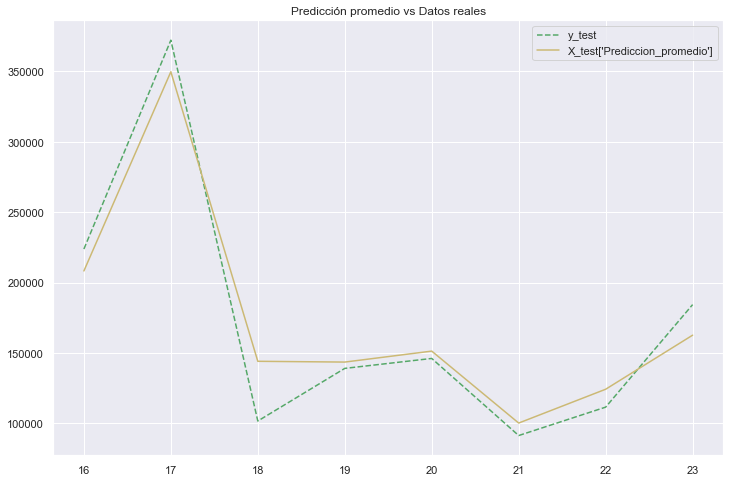

In [92]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]), y_test, "g--", 
         label="y_test")
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]), X_test['Prediccion_promedio'], "y", 
         label="X_test['Prediccion_promedio']")
plt.title("Predicción promedio vs Datos reales")
plt.legend()

Text(0, 0.5, 'Predicción promedio')

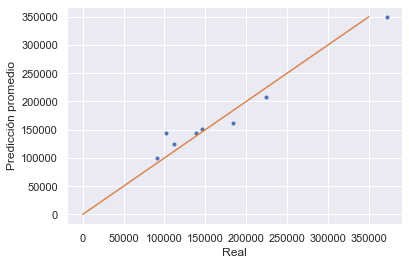

In [93]:
plt.plot(y_test, X_test['Prediccion_promedio'], '.')
plt.plot([0,350000], [0,350000])
plt.xlabel("Real")
plt.ylabel("Predicción promedio")

### Conclusiones finales
<ol>
<li>El modelo de ensamble otorga mayor precisión en la predicción de la serie de tiempo aunque si comparamos los gráficos observaremos una mayor distancia en el pico inferior.</li>
<li>Si miramos el resto de las métricas vamos a ver que los errores son también muy altos. Quizás se deba a que no estamos considerando variables exógenas o que el dataset es pequeño</li>
<li>Si bien construimos el desafío apartir de los pocos datos que ofrece la fuente, pudimos descubrir cómo el comportamiento de las ventas y predecir valores futuros. Consideramos que se podrían obtener mejores resultados si se facilitase el contexto del dataset. Más allá de eso este modelo puede servir para tener una aproximación de la estimación del negocio aunque hacen falta mayores análisis para la toma de decisiones</li>
</ol>

🙌